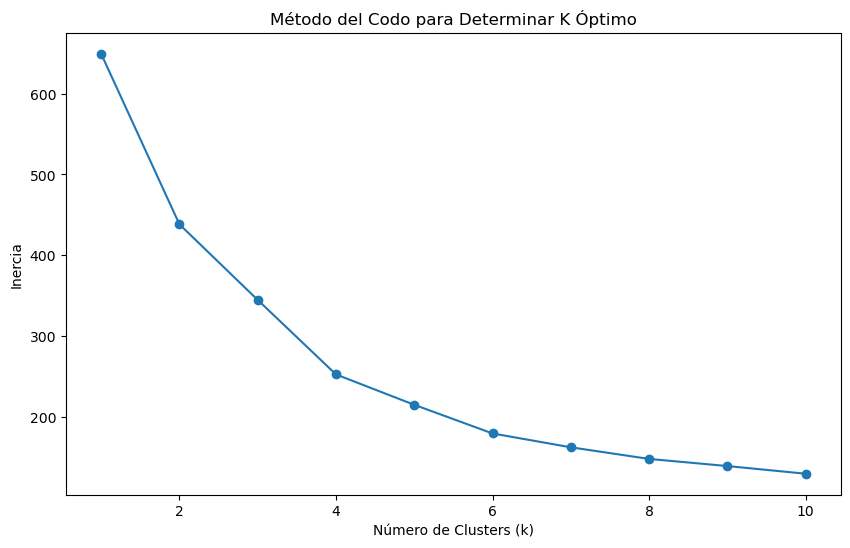

Coeficiente de Silhouette: 0.35817803722396446
Índice de Calinski-Harabasz: 98.31250518011369


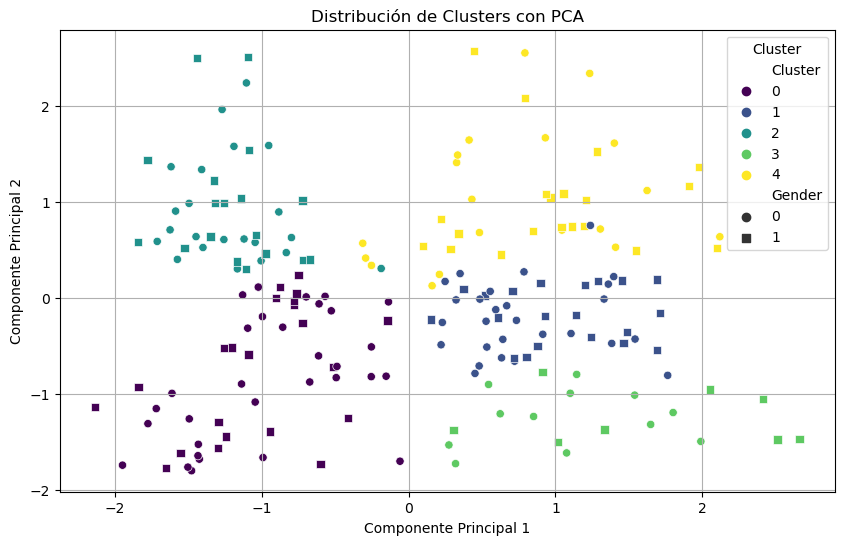

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Cargar datos
data = pd.read_csv('Mall_Customers.csv')

# Preprocesamiento
# Eliminar outliers
for column in ['Annual Income (k$)', 'Spending Score (1-100)']:
    percentiles = data[column].quantile([0.01, 0.99]).values
    data[column] = data[column].clip(lower=percentiles[0], upper=percentiles[1])

# Estandarización de variables numéricas
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Codificación de variables categóricas
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Selección de características
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

# Entrenamiento del modelo de K-means con k=5
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)
data['Cluster'] = clusters

# Aplicación de PCA para visualización en 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
data['PCA1'] = pca_features[:,0]
data['PCA2'] = pca_features[:,1]

# Evaluación del modelo
silhouette_avg = silhouette_score(features, clusters)
calinski_harabasz = calinski_harabasz_score(features, clusters)
print('Coeficiente de Silhouette:', silhouette_avg)
print('Índice de Calinski-Harabasz:', calinski_harabasz)

# Visualización de los clusters con PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', style='Gender', markers=['o', 's'])
plt.title('Distribución de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
